In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from Bio import Entrez
from tqdm import tqdm

In [4]:
data = pd.read_csv (r'data/SFARI-Genes.csv')
cols = data.columns
N, D = data.shape
print(cols)

Index(['status', 'gene-symbol', 'gene-name', 'ensembl-id', 'chromosome',
       'genetic-category', 'gene-score', 'syndromic', 'number-of-reports'],
      dtype='object')


In [161]:
gene_symbols = data["gene-symbol"].values

# task 1

Text(0.5, 1.0, 'A bar chart to show the number of genes in each\nSFARI gene-score category')

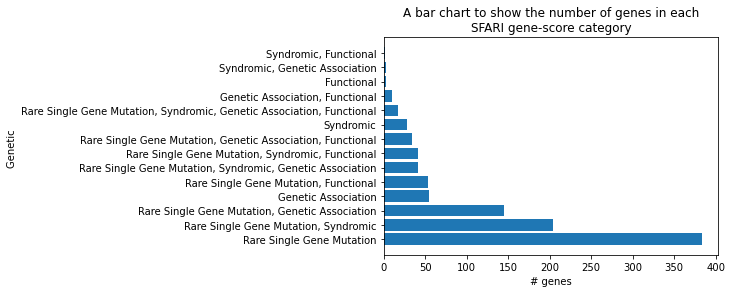

In [5]:
gene_cats_data = data['genetic-category']
gene_cat_counts = gene_cats_data.value_counts()
gene_cat_vals = gene_cat_counts.index

A, B = gene_cat_vals.size, gene_cat_counts.size
assert(A == B)

plt.barh(gene_cat_vals, gene_cat_counts)
plt.xlabel("# genes")
plt.ylabel("Genetic ")
plt.title("A bar chart to show the number of genes in each\nSFARI gene-score category")

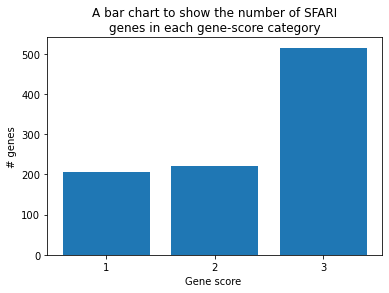

In [65]:
gene_cats_data = data['gene-score']
gene_cat_counts = gene_cats_data.value_counts()
gene_cat_vals = gene_cat_counts.index

A, B = gene_cat_vals.size, gene_cat_counts.size
assert(A == B)

fig = plt.figure()
plt.bar(gene_cat_vals, gene_cat_counts)
plt.ylabel("# genes")
plt.xlabel("Gene score ")
plt.xticks(gene_cat_vals)
plt.title("A bar chart to show the number of SFARI\ngenes in each gene-score category")
fig.savefig(f'{os.getcwd()}/results/task1-1.pdf', dpi=fig.dpi)

In [61]:
gene_cat_vals

array([ 3.,  2.,  1., nan])

['1.0', '2.0', '3.0', 'nan']


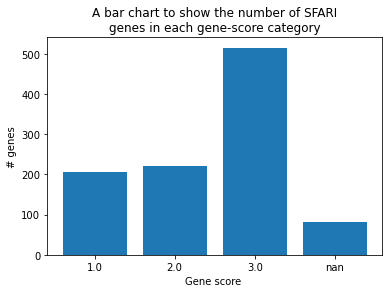

In [83]:
gene_cats_data = data.sort_values("gene-score")['gene-score']
gene_cat_vals = gene_cats_data.unique()
gene_cat_counts = []
for g in gene_cat_vals:
    if np.isnan(g):
        score_indexes = gene_cats_data[gene_cats_data.isnull()].index
    else:
        score_indexes = gene_cats_data[gene_cats_data == g].index
    gene_cat_counts.append(score_indexes.size)
    

A, B = gene_cat_vals.size, len(gene_cat_counts)
assert(A == B)

ticks = np.arange(gene_cat_vals.size)
tick_vals = [str(val) for val in gene_cat_vals]
print(tick_vals)

fig = plt.figure()
plt.bar(ticks, gene_cat_counts)
plt.ylabel("# genes")
plt.xlabel("Gene score ")
plt.xticks(ticks, tick_vals)
plt.title("A bar chart to show the number of SFARI\ngenes in each gene-score category")
fig.savefig(f'{os.getcwd()}/results/task1-1-v2.pdf', dpi=fig.dpi)

# task 2

In [157]:
ranked_data = data.sort_values("number-of-reports")
indexes = ranked_data.index[ranked_data['gene-score'] == 1].tolist()
gene_scores = ranked_data['gene-score']
num_reports = ranked_data["number-of-reports"]

display(ranked_data)

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,number-of-reports
511,9,KNG1,kininogen 1,ENSG00000113889,3,Rare Single Gene Mutation,3.0,0,1
574,9,MNT,MAX network transcriptional repressor,ENSG00000070444,17,Genetic Association,3.0,0,1
923,9,TFB2M,"transcription factor B2, mitochondrial",ENSG00000162851,1,Rare Single Gene Mutation,3.0,0,1
562,9,NEO1,Neogenin 1,ENSG00000067141,15,NaN,3.0,0,1
925,9,TMEM134,transmembrane protein 134,ENSG00000172663,11,Rare Single Gene Mutation,3.0,0,1
...,...,...,...,...,...,...,...,...,...
184,9,CNTNAP2,contactin associated protein-like 2,ENSG00000174469,7,"Rare Single Gene Mutation, Syndromic, Genetic ...",2.0,1,71
789,9,SCN2A,"sodium channel, voltage-gated, type II, alpha ...",ENSG00000136531,2,"Rare Single Gene Mutation, Syndromic",1.0,0,75
510,9,MECP2,Methyl CpG binding protein 2,ENSG00000169057,X,"Rare Single Gene Mutation, Syndromic, Functional",1.0,1,90
812,9,SHANK3,SH3 and multiple ankyrin repeat domains 3,ENSG00000251322,22,"Rare Single Gene Mutation, Syndromic, Genetic ...",1.0,1,92


In [118]:
gs = data["gene-symbol"]
data.iloc[gs[gs == "RP11-1407O15.2"].index[0]]

status                                       9
gene-symbol                     RP11-1407O15.2
gene-name                                  NaN
ensembl-id                                 NaN
chromosome                                  17
genetic-category     Rare Single Gene Mutation
gene-score                                 3.0
syndromic                                    0
number-of-reports                            1
Name: 771, dtype: object

In [5]:
indexes[-5:]

[780, 789, 510, 812, 596]

In [7]:
for i in indexes[-5:]:
    print(i)
    print(data.iloc[i]["number-of-reports"])
    print()

780
68

789
75

510
90

812
92

596
94



# task 3

In [ ]:
# This task was completed manually

# task 4

In [229]:
genes = ["NRXN1", "SHANK3", "MECP2", "SCN2A", "SCN1A"]
files = ["nrxn1", "shank3", "mecp2", "scn2a", "scn1a"]

In [ ]:
# Getting gene-names and ensemblIDs for the above genes^

In [255]:
gs = data["gene-symbol"]
ensembls = []
names = []

for g in gene_symbols:
    idx = gs[gs == g].index[0]
    ensembls.append(data["ensembl-id"].iloc[idx])
    names.append(data["gene-name"].iloc[idx])

In [ ]:
# load data manually from CSVs

In [83]:
years = np.concatenate(([1993], np.arange(1999,2022, 1)))
year_data = np.zeros((5, years.size))


for f in range(5):
    file = files[f]
    
    gene_data = pd.read_csv(os.getcwd() + "/data/task1-4/" + file + ".csv")
    year_data_f = gene_data["Publication Year"].value_counts().sort_index()
    
    for y in range(years.size):
        year = years[y]
        
        if year in year_data_f.index:
            year_data[f, y] = year_data_f[year]

In [84]:
year_data2 = []
#citation_data = []
#pmids = []

for f in range(5):
    file = files[f]
    
    gene_data = pd.read_csv(os.getcwd() + "/data/task1-4/" + file + ".csv")
    year_data2.append(gene_data["Publication Year"].values.tolist())
    #citation_data.append(gene_data["Citation"].values.size)
    #pmids.append(gene_data["PMID"].values.tolist())

In [85]:
gene_data["Citation"]

0     Epilepsia. 2019 Dec;60 Suppl 3:S17-S24. doi: 1...
1     Neuron. 2020 May 6;106(3):421-437.e11. doi: 10...
2     Nature. 2012 Apr 4;485(7397):246-50. doi: 10.1...
3     Nature. 2012 Sep 20;489(7416):385-90. doi: 10....
4     Nat Genet. 2011 Jun;43(6):585-9. doi: 10.1038/...
                            ...                        
63    Pract Neurol. 2017 Aug;17(4):314-317. doi: 10....
64    J Pediatr Neurosci. 2012 May;7(2):123-5. doi: ...
65    J Neurosci. 2004 Mar 17;24(11):2690-8. doi: 10...
66    Gene. 2013 Dec 15;532(2):294-6. doi: 10.1016/j...
67    J Child Neurol. 2004 Aug;19(8):597-603. doi: 1...
Name: Citation, Length: 68, dtype: object

In [ ]:
# load data dynamically from NCBI

In [165]:
for i in tqdm(gene_symbols):
    i

100%|██████████████████████████████████| 1023/1023 [00:00<00:00, 5138650.29it/s]


In [ ]:
Entrez.email = "s1803764@ed.ac.uk"
all_gene_dates = []
#ll_dates = []

for j, g in tqdm(enumerate(gene_symbols)):
#for j in range(1022,1023):
    #g = gene_symbols[j]
    #print(names[j])
   # print(ensembls[j])
    handle = Entrez.esearch(db="pubmed",retmax=5000, term=f"({g}[TW] OR {names[j]}[TW] OR {ensembls[j]}[TW]) AND (autism[MH] OR autistic[MH] OR ASD[TW] OR \"autism spectrum disorder\"[TW] OR \"pervasive developmental disorder\"[TW] OR PDD-NOS[TW] OR PDD[TW] OR asperger[MH])")
    record = Entrez.read(handle)
    #print(record)
    ids = record["IdList"]
    #print(record["ErrorList"]["PhraseNotFound"])
    #print(g)
    
    dates = []
    for i in tqdm(ids):
        handle2 = Entrez.esummary(db="pubmed", retmax=5000, id=i)
        meta_data = Entrez.read(handle2)[0]
        #print(meta_data["PubDate"])
        #print(meta_data)
        dates.append(meta_data["PubDate"][0:4])

    all_gene_dates.append(dates)
    #all_gene_dates[j] = dates

0it [00:00, ?it/s]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.78it/s]
1it [00:03,  3.12s/it]
0it [00:00, ?it/s]
2it [00:03,  1.66s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.73it/s]
3it [00:06,  2.28s/it]
0it [00:00, ?it/s]
4it [00:07,  1.63s/it]
100%|███████████████████████████████████████████| 24/24 [00:14<00:00,  1.67it/s]
5it [00:22,  6.47s/it]
0it [00:00, ?it/s]
6it [00:23,  4.51s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.74it/s]
7it [00:25,  3.64s/it]
100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.78it/s]
8it [00:28,  3.59s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.73it/s]
9it [00:29,  2.87s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.34it/s]
10it [00:31,  2.43s/it]
100%|███████████████████████████████████████████| 13/13 [00:07<00:00,  1.68it/s]
11it [00:39,  4.27s/it]
100%|████████████████

100%|███████████████████████████████████████████| 42/42 [00:25<00:00,  1.64it/s]
15it [01:09,  9.40s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.69it/s]
16it [01:11,  7.15s/it]
100%|███████████████████████████████████████████| 47/47 [00:29<00:00,  1.61it/s]
17it [01:41, 13.99s/it]
100%|█████████████████████████████████████████████| 9/9 [00:05<00:00,  1.67it/s]
18it [01:47, 11.62s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.65it/s]
19it [01:49,  8.90s/it]
0it [00:00, ?it/s]
20it [01:50,  6.43s/it]
0it [00:00, ?it/s]
21it [01:51,  4.69s/it]
0it [00:00, ?it/s]
22it [01:51,  3.48s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.73it/s]
23it [01:52,  2.80s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.78it/s]
24it [01:55,  2.70s/it]
0it [00:00, ?it/s]
25it [01:56,  2.10s/it]
0it [00:00, ?it/s]
26it [01:56,  1.71s/it]
100%|█████████████████████████████████████████████

100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.76it/s]
28it [02:00,  1.80s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.39it/s]
29it [02:04,  2.33s/it]
0it [00:00, ?it/s]
30it [02:04,  1.84s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.62it/s]
31it [02:07,  2.04s/it]
0it [00:00, ?it/s]
32it [02:08,  1.65s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.67it/s]
33it [02:10,  1.72s/it]
100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.73it/s]
34it [02:14,  2.60s/it]
100%|█████████████████████████████████████████████| 8/8 [00:05<00:00,  1.38it/s]
35it [02:21,  3.75s/it]
100%|███████████████████████████████████████████| 12/12 [00:07<00:00,  1.71it/s]
36it [02:28,  4.96s/it]
100%|███████████████████████████████████████████| 14/14 [00:08<00:00,  1.63it/s]
37it [02:38,  6.26s/it]
0it [00:00, ?it/s]
38it [02:39,  4.64s/it]
0it [00:00, ?it/s]
39it [02:39,

100%|███████████████████████████████████████████| 25/25 [00:15<00:00,  1.66it/s]
53it [03:13,  5.82s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.61it/s]
54it [03:14,  4.48s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.77it/s]
55it [03:16,  3.67s/it]
100%|███████████████████████████████████████████| 15/15 [00:08<00:00,  1.68it/s]
56it [03:26,  5.45s/it]
0it [00:00, ?it/s]
57it [03:26,  4.02s/it]
0it [00:00, ?it/s]
58it [03:27,  2.99s/it]
0it [00:00, ?it/s]
59it [03:28,  2.30s/it]
100%|███████████████████████████████████████████| 13/13 [00:08<00:00,  1.61it/s]
60it [03:36,  4.24s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.65it/s]
61it [03:39,  3.72s/it]
100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.70it/s]
62it [03:45,  4.55s/it]
0it [00:00, ?it/s]
63it [03:46,  3.38s/it]
100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.65it/s]
64it [03:50,

100%|█████████████████████████████████████████████| 8/8 [00:04<00:00,  1.70it/s]
69it [04:06,  3.50s/it]
100%|███████████████████████████████████████████| 35/35 [00:22<00:00,  1.58it/s]
70it [04:28,  9.34s/it]
100%|███████████████████████████████████████████| 12/12 [00:07<00:00,  1.55it/s]
71it [04:37,  9.12s/it]
0it [00:00, ?it/s]
72it [04:38,  6.66s/it]
100%|███████████████████████████████████████████| 26/26 [00:15<00:00,  1.69it/s]
73it [04:54,  9.50s/it]
0it [00:00, ?it/s]
74it [04:55,  6.87s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.69it/s]
75it [04:57,  5.56s/it]
0it [00:00, ?it/s]
76it [04:58,  4.07s/it]
0it [00:00, ?it/s]
77it [04:59,  3.06s/it]
 60%|███████████████████████████                  | 3/5 [00:01<00:01,  1.56it/s]


100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.67it/s]
78it [05:02,  3.23s/it]
0it [00:00, ?it/s]
79it [05:03,  2.46s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.76it/s]
80it [05:05,  2.27s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.89it/s]
81it [05:06,  1.94s/it]
100%|███████████████████████████████████████████| 60/60 [00:36<00:00,  1.66it/s]
82it [05:43, 12.37s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.78it/s]
83it [05:46,  9.53s/it]
0it [00:00, ?it/s]
84it [05:46,  6.85s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.68it/s]
85it [05:49,  5.54s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.60it/s]
86it [05:50,  4.27s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.44it/s]
87it [05:51,  3.40s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.7

100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.56it/s]
91it [06:00,  2.61s/it]
0it [00:00, ?it/s]
92it [06:01,  2.04s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.86it/s]
93it [06:02,  1.79s/it]
0it [00:00, ?it/s]
94it [06:02,  1.43s/it]
0it [00:00, ?it/s]
95it [06:03,  1.20s/it]
100%|███████████████████████████████████████████| 12/12 [00:07<00:00,  1.57it/s]
96it [06:11,  3.34s/it]
0it [00:00, ?it/s]
97it [06:12,  2.55s/it]
100%|█████████████████████████████████████████████| 9/9 [00:05<00:00,  1.61it/s]
98it [06:19,  3.69s/it]
100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.75it/s]
99it [06:22,  3.66s/it]
 68%|█████████████████████████████▎             | 60/88 [00:36<00:16,  1.73it/s]


100%|███████████████████████████████████████████| 88/88 [00:53<00:00,  1.65it/s]
100it [07:16, 18.83s/it]
100%|███████████████████████████████████████████| 14/14 [00:08<00:00,  1.72it/s]
101it [07:25, 15.85s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.58it/s]
102it [07:29, 12.09s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.63it/s]
103it [07:31,  9.24s/it]
100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.44it/s]
104it [07:34,  7.32s/it]
100%|███████████████████████████████████████████| 12/12 [00:07<00:00,  1.63it/s]
105it [07:42,  7.54s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.57it/s]
106it [07:44,  5.91s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.74it/s]
107it [07:46,  4.71s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.77it/s]
108it [07:48,  3.88s/it]
100%|█████████████████████████████████████████

100%|███████████████████████████████████████████| 19/19 [00:11<00:00,  1.65it/s]
110it [08:07,  6.97s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.66it/s]
111it [08:09,  5.64s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.73it/s]
112it [08:11,  4.31s/it]
100%|███████████████████████████████████████████| 18/18 [00:12<00:00,  1.49it/s]
113it [08:23,  6.84s/it]
100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.65it/s]
114it [08:28,  6.28s/it]
0it [00:00, ?it/s]
115it [08:29,  4.59s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.65it/s]
116it [08:32,  4.16s/it]
0it [00:00, ?it/s]
117it [08:33,  3.13s/it]
100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.29it/s]
118it [08:36,  3.09s/it]
0it [00:00, ?it/s]
119it [08:37,  2.36s/it]
100%|███████████████████████████████████████████| 16/16 [00:09<00:00,  1.66it/s]
120it [08:47,  4.76s/it]
0it [00:00, ?it/s]
1

100%|███████████████████████████████████████████| 44/44 [00:26<00:00,  1.65it/s]
131it [09:29,  8.91s/it]
0it [00:00, ?it/s]
132it [09:30,  6.53s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.44it/s]
133it [09:31,  4.98s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.71it/s]
134it [09:34,  4.24s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.70it/s]
135it [09:35,  3.36s/it]
0it [00:00, ?it/s]
136it [09:36,  2.54s/it]
100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.67it/s]
137it [09:40,  3.06s/it]
100%|█████████████████████████████████████████████| 9/9 [00:05<00:00,  1.63it/s]
138it [09:46,  4.01s/it]
0it [00:00, ?it/s]
139it [09:47,  3.04s/it]
100%|█████████████████████████████████████████████| 9/9 [00:05<00:00,  1.61it/s]
140it [09:53,  4.01s/it]
0it [00:00, ?it/s]
141it [09:54,  3.01s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.68it/s]
1

100%|███████████████████████████████████████████| 23/23 [00:13<00:00,  1.66it/s]
145it [10:13,  5.83s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.38it/s]
146it [10:15,  4.54s/it]
0it [00:00, ?it/s]
147it [10:15,  3.37s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.41it/s]
148it [10:18,  2.98s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.81it/s]
149it [10:19,  2.64s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.73it/s]
150it [10:22,  2.57s/it]
0it [00:00, ?it/s]
151it [10:22,  1.99s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.65it/s]
152it [10:25,  2.17s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.48it/s]
153it [10:26,  1.92s/it]
0it [00:00, ?it/s]
154it [10:27,  1.54s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.88it/s]
155it [10:28,  1.43s/it]
100%|███████████████

100%|█████████████████████████████████████████| 100/100 [01:02<00:00,  1.60it/s]
160it [11:54, 22.56s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.83it/s]
161it [11:55, 16.32s/it]
0it [00:00, ?it/s]
162it [11:56, 11.61s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.57it/s]
163it [11:57,  8.53s/it]
 32%|██████████████                              | 8/25 [00:05<00:11,  1.51it/s]


100%|███████████████████████████████████████████| 25/25 [00:17<00:00,  1.40it/s]
164it [12:16, 11.62s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.52it/s]
165it [12:18,  8.60s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.37it/s]
166it [12:20,  6.59s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.08it/s]
167it [12:22,  5.36s/it]
0it [00:00, ?it/s]
168it [12:24,  4.14s/it]
0it [00:00, ?it/s]
169it [12:25,  3.23s/it]
0it [00:00, ?it/s]
170it [12:25,  2.46s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.31it/s]
171it [12:28,  2.39s/it]
0it [00:00, ?it/s]
172it [12:28,  1.93s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.32it/s]
173it [12:30,  1.89s/it]
100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.21it/s]
174it [12:33,  2.29s/it]
100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.25it/s]
1

100%|███████████████████████████████████████████| 17/17 [00:11<00:00,  1.42it/s]
184it [13:23,  8.64s/it]
 60%|█████████████████████████                 | 86/144 [00:53<00:34,  1.68it/s]


100%|█████████████████████████████████████████| 144/144 [01:28<00:00,  1.62it/s]
185it [14:53, 32.98s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.77it/s]
186it [14:55, 23.48s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.66it/s]
187it [14:57, 17.20s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.63it/s]
188it [15:00, 13.01s/it]
0it [00:00, ?it/s]
189it [15:01,  9.31s/it]
0it [00:00, ?it/s]
190it [15:02,  6.76s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.57it/s]
191it [15:04,  5.32s/it]
100%|███████████████████████████████████████████| 14/14 [00:08<00:00,  1.57it/s]
192it [15:13,  6.61s/it]
100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.63it/s]
193it [15:17,  5.79s/it]
  0%|                                                     | 0/8 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████| 8/8 [00:05<00:00,  1.57it/s]
194it [15:23,  5.80s/it]
0it [00:00, ?it/s]
195it [15:24,  4.24s/it]
100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.48it/s]
196it [15:28,  4.23s/it]
0it [00:00, ?it/s]
197it [15:28,  3.14s/it]
0it [00:00, ?it/s]
198it [15:29,  2.43s/it]
100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.69it/s]
199it [15:36,  3.69s/it]
0it [00:00, ?it/s]
200it [15:37,  2.78s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.55it/s]
201it [15:39,  2.75s/it]
100%|███████████████████████████████████████████| 12/12 [00:07<00:00,  1.64it/s]
202it [15:47,  4.33s/it]
0it [00:00, ?it/s]
203it [15:48,  3.23s/it]
0it [00:00, ?it/s]
204it [15:49,  2.45s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.61it/s]
205it [15:50,  2.12s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.67it/s]
206it [15:51,  1.87

100%|███████████████████████████████████████████| 35/35 [00:21<00:00,  1.66it/s]
212it [16:24,  7.95s/it]
0it [00:00, ?it/s]
213it [16:24,  5.78s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.79it/s]
214it [16:26,  4.43s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.51it/s]
215it [16:29,  4.11s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.72it/s]
216it [16:31,  3.43s/it]
100%|█████████████████████████████████████████████| 8/8 [00:04<00:00,  1.60it/s]
217it [16:37,  4.16s/it]
0it [00:00, ?it/s]
218it [16:37,  3.13s/it]
0it [00:00, ?it/s]
219it [16:38,  2.38s/it]
100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.71it/s]
220it [16:42,  2.74s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.84it/s]
221it [16:43,  2.29s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.49it/s]
222it [16:45,  2.23s/it]
100%|███████████████

100%|███████████████████████████████████████████| 31/31 [00:28<00:00,  1.07it/s]
232it [17:53, 12.13s/it]
100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.54it/s]
233it [17:58,  9.92s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.10it/s]
234it [17:59,  7.43s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.49it/s]
235it [18:01,  5.64s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.65it/s]
236it [18:03,  4.54s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.53it/s]
237it [18:05,  3.80s/it]
100%|█████████████████████████████████████████████| 4/4 [00:03<00:00,  1.03it/s]
238it [18:10,  4.25s/it]
0it [00:00, ?it/s]
239it [18:11,  3.21s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.39it/s]
240it [18:15,  3.36s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.32it/s]
241it [18:16,  2.79s/it]
10

100%|█████████████████████████████████████████████| 8/8 [00:05<00:00,  1.44it/s]
253it [18:43,  3.17s/it]
100%|█████████████████████████████████████████████| 4/4 [00:03<00:00,  1.07it/s]
254it [18:48,  3.52s/it]
100%|███████████████████████████████████████████| 11/11 [00:53<00:00,  4.84s/it]
255it [19:42, 18.70s/it]
100%|█████████████████████████████████████████████| 7/7 [00:05<00:00,  1.22it/s]
256it [19:52, 16.14s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.02it/s]
257it [19:55, 12.15s/it]
100%|█████████████████████████████████████████████| 6/6 [00:05<00:00,  1.11it/s]
258it [20:02, 10.50s/it]
0it [00:00, ?it/s]
259it [20:03,  7.70s/it]
100%|███████████████████████████████████████████| 11/11 [00:07<00:00,  1.50it/s]
260it [20:11,  7.80s/it]
100%|███████████████████████████████████████████| 10/10 [00:06<00:00,  1.56it/s]
261it [20:18,  7.61s/it]
100%|███████████████████████████████████████████| 10/10 [00:07<00:00,  1.36it/s]
262it [20:26,  7.74s/it]
10

100%|███████████████████████████████████████████| 33/33 [00:22<00:00,  1.44it/s]
266it [21:04, 11.49s/it]
100%|███████████████████████████████████████████| 16/16 [00:09<00:00,  1.60it/s]
267it [21:17, 12.05s/it]
100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.65it/s]
268it [21:23, 10.01s/it]
100%|█████████████████████████████████████████████| 9/9 [00:06<00:00,  1.31it/s]
269it [21:30,  9.28s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.67it/s]
270it [21:33,  7.26s/it]
0it [00:00, ?it/s]
271it [21:33,  5.29s/it]
0it [00:00, ?it/s]
272it [21:34,  3.89s/it]
0it [00:00, ?it/s]
273it [21:35,  2.94s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.65it/s]
274it [21:37,  2.64s/it]
0it [00:00, ?it/s]
275it [21:37,  2.04s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.40it/s]
276it [21:40,  2.18s/it]
100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.69it/s]
2

100%|███████████████████████████████████████████| 26/26 [00:16<00:00,  1.58it/s]
280it [22:06,  6.88s/it]
0it [00:00, ?it/s]
281it [22:07,  5.02s/it]
100%|███████████████████████████████████████████| 24/24 [00:15<00:00,  1.56it/s]
282it [22:23,  8.40s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.65it/s]
283it [22:24,  6.30s/it]
0it [00:00, ?it/s]
284it [22:25,  4.60s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.54it/s]
285it [22:28,  4.01s/it]
 79%|██████████████████████████████████         | 42/53 [00:26<00:06,  1.62it/s]


100%|███████████████████████████████████████████| 53/53 [00:32<00:00,  1.61it/s]
286it [23:01, 12.90s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.61it/s]
287it [23:04,  9.79s/it]
0it [00:00, ?it/s]
288it [23:04,  7.05s/it]
0it [00:00, ?it/s]
289it [23:05,  5.12s/it]
0it [00:00, ?it/s]
290it [23:06,  3.80s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.59it/s]
291it [23:07,  3.06s/it]
0it [00:00, ?it/s]
292it [23:08,  2.35s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.57it/s]
293it [23:10,  2.26s/it]
0it [00:00, ?it/s]
294it [23:10,  1.79s/it]
0it [00:00, ?it/s]
295it [23:11,  1.47s/it]
0it [00:00, ?it/s]
296it [23:12,  1.24s/it]
0it [00:00, ?it/s]
297it [23:13,  1.06s/it]
0it [00:00, ?it/s]
298it [23:13,  1.01s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.45it/s]
299it [23:15,  1.17s/it]
0it [00:00, ?it/s]
300it [23:16,  1.03s/it]
100%|█████████████████████████

 32%|████████████▉                            | 123/390 [01:15<02:41,  1.66it/s]


 56%|███████████████████████▏                 | 220/390 [02:16<01:49,  1.55it/s]


 81%|█████████████████████████████████▎       | 317/390 [03:17<00:47,  1.54it/s]


100%|█████████████████████████████████████████| 390/390 [04:01<00:00,  1.62it/s]
315it [27:45, 74.40s/it]
100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.67it/s]
316it [27:50, 53.54s/it]
 38%|████████████████▎                          | 14/37 [00:08<00:12,  1.79it/s]


100%|███████████████████████████████████████████| 37/37 [00:21<00:00,  1.70it/s]
317it [28:13, 44.20s/it]
100%|███████████████████████████████████████████| 56/56 [00:34<00:00,  1.60it/s]
318it [28:48, 41.62s/it]
0it [00:00, ?it/s]
319it [28:49, 29.32s/it]
0it [00:00, ?it/s]
320it [28:49, 20.71s/it]
100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.66it/s]
321it [28:53, 15.63s/it]
0it [00:00, ?it/s]
322it [28:54, 11.18s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.74it/s]
323it [28:55,  8.23s/it]
100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.60it/s]
324it [28:59,  6.93s/it]


100%|███████████████████████████████████████████| 16/16 [00:09<00:00,  1.63it/s]
325it [29:10,  8.00s/it]
0it [00:00, ?it/s]
326it [29:10,  5.80s/it]
0it [00:00, ?it/s]
327it [29:11,  4.25s/it]
0it [00:00, ?it/s]
328it [29:12,  3.15s/it]
0it [00:00, ?it/s]
329it [29:12,  2.39s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.58it/s]
330it [29:15,  2.48s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.66it/s]
331it [29:17,  2.32s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.51it/s]
332it [29:18,  2.03s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.40it/s]
333it [29:20,  1.84s/it]
100%|███████████████████████████████████████████| 10/10 [00:06<00:00,  1.54it/s]
334it [29:27,  3.45s/it]
100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.64it/s]
335it [29:31,  3.53s/it]
0it [00:00, ?it/s]
336it [29:31,  2.68s/it]
0it [00:00, ?it/s]
337it [29:32,  2.07

100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.44it/s]
351it [30:04,  3.69s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.70it/s]
352it [30:05,  2.98s/it]
0it [00:00, ?it/s]
353it [30:06,  2.28s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.57it/s]
354it [30:08,  2.21s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.36it/s]
355it [30:10,  2.20s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.57it/s]
356it [30:12,  2.34s/it]
100%|███████████████████████████████████████████| 23/23 [00:14<00:00,  1.57it/s]
357it [30:28,  6.24s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.70it/s]
358it [30:30,  4.97s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.70it/s]
359it [30:32,  4.06s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.64it/s]
360it [30:35,  3.81s/it]
10

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.81it/s]
369it [31:04,  2.84s/it]
100%|███████████████████████████████████████████| 16/16 [00:09<00:00,  1.65it/s]
370it [31:14,  5.11s/it]
100%|███████████████████████████████████████████| 13/13 [00:07<00:00,  1.70it/s]
371it [31:23,  6.06s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.81it/s]
372it [31:25,  4.93s/it]
0it [00:00, ?it/s]
373it [31:26,  3.66s/it]
 85%|████████████████████████████████████▋      | 58/68 [00:35<00:06,  1.64it/s]


100%|███████████████████████████████████████████| 68/68 [00:41<00:00,  1.64it/s]
374it [32:08, 15.24s/it]
0it [00:00, ?it/s]
375it [32:09, 10.87s/it]
100%|███████████████████████████████████████████| 33/33 [00:19<00:00,  1.67it/s]
376it [32:29, 13.74s/it]
100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.58it/s]
377it [32:33, 10.82s/it]
100%|███████████████████████████████████████████| 20/20 [00:12<00:00,  1.61it/s]
378it [32:46, 11.50s/it]
100%|███████████████████████████████████████████| 12/12 [00:06<00:00,  1.76it/s]
379it [32:54, 10.30s/it]
100%|███████████████████████████████████████████| 10/10 [00:06<00:00,  1.59it/s]
380it [33:01,  9.28s/it]


0it [00:00, ?it/s]
381it [33:01,  6.68s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.79it/s]
382it [33:02,  5.09s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.82it/s]
383it [33:04,  3.94s/it]
100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.72it/s]
384it [33:10,  4.72s/it]
100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.59it/s]
385it [33:14,  4.47s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.82it/s]
386it [33:15,  3.48s/it]
0it [00:00, ?it/s]
387it [33:16,  2.65s/it]
0it [00:00, ?it/s]
388it [33:17,  2.07s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.71it/s]
389it [33:19,  2.02s/it]
0it [00:00, ?it/s]
390it [33:19,  1.59s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.64it/s]
391it [33:22,  2.05s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.63it/s]
3

404it [34:02,  3.05s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.51it/s]
405it [34:04,  2.73s/it]
0it [00:00, ?it/s]
406it [34:05,  2.11s/it]
100%|███████████████████████████████████████████| 19/19 [00:11<00:00,  1.60it/s]
407it [34:18,  5.25s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.56it/s]
408it [34:20,  4.26s/it]
0it [00:00, ?it/s]
409it [34:20,  3.21s/it]
0it [00:00, ?it/s]
410it [34:21,  2.46s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.63it/s]
411it [34:22,  2.13s/it]
0it [00:00, ?it/s]
412it [34:23,  1.69s/it]
0it [00:00, ?it/s]
413it [34:24,  1.38s/it]
0it [00:00, ?it/s]
414it [34:24,  1.15s/it]
100%|█████████████████████████████████████████████| 8/8 [00:04<00:00,  1.64it/s]
415it [34:30,  2.51s/it]
0it [00:00, ?it/s]
416it [34:31,  1.94s/it]
0it [00:00, ?it/s]
417it [34:31,  1.57s/it]
100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.72it/s]
418it [34:35

100%|███████████████████████████████████████████| 49/49 [00:33<00:00,  1.44it/s]
427it [35:32, 11.43s/it]
100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.64it/s]
428it [35:36,  9.13s/it]
100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.58it/s]
429it [35:40,  7.74s/it]
100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.45it/s]
430it [35:46,  7.08s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.63it/s]
431it [35:47,  5.37s/it]
0it [00:00, ?it/s]
432it [35:48,  4.00s/it]
0it [00:00, ?it/s]
433it [35:49,  3.02s/it]
100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.66it/s]
434it [35:53,  3.41s/it]
100%|███████████████████████████████████████████| 15/15 [00:09<00:00,  1.58it/s]
435it [36:04,  5.57s/it]
100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.61it/s]
436it [36:09,  5.41s/it]
0it [00:00, ?it/s]
437it [36:09,  4.01s/it]
0it [00:00, ?it/s]
4

100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.67it/s]
441it [36:14,  2.04s/it]
100%|█████████████████████████████████████████████| 8/8 [00:04<00:00,  1.64it/s]
442it [36:20,  3.13s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.53it/s]
443it [36:21,  2.67s/it]
100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.41it/s]
444it [36:26,  3.21s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.54it/s]
445it [36:28,  3.06s/it]
100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.68it/s]
446it [36:32,  3.25s/it]
0it [00:00, ?it/s]
447it [36:33,  2.49s/it]
0it [00:00, ?it/s]
448it [36:33,  1.95s/it]
100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.62it/s]
449it [36:39,  2.94s/it]
100%|█████████████████████████████████████████████| 9/9 [00:05<00:00,  1.61it/s]
450it [36:45,  3.95s/it]
100%|█████████████████████████████████████████████| 4/4 [00:03<0

100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.56it/s]
467it [37:17,  1.92s/it]
0it [00:00, ?it/s]
468it [37:18,  1.54s/it]
100%|█████████████████████████████████████████████| 8/8 [00:04<00:00,  1.61it/s]
469it [37:24,  2.77s/it]
0it [00:00, ?it/s]
470it [37:24,  2.13s/it]
0it [00:00, ?it/s]
471it [37:25,  1.68s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.57it/s]
472it [37:27,  1.76s/it]
0it [00:00, ?it/s]
473it [37:28,  1.43s/it]
0it [00:00, ?it/s]
474it [37:28,  1.19s/it]
0it [00:00, ?it/s]
475it [37:29,  1.05s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.76it/s]
476it [37:30,  1.10s/it]
0it [00:00, ?it/s]
477it [37:31,  1.02s/it]
0it [00:00, ?it/s]
478it [37:32,  1.11it/s]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.63it/s]
479it [37:34,  1.20s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.69it/s]
480it [37:36,  1.60s/it]
100%|███████

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.76it/s]
494it [38:21,  1.75s/it]
100%|███████████████████████████████████████████| 14/14 [00:09<00:00,  1.43it/s]
495it [38:32,  4.39s/it]
100%|███████████████████████████████████████████| 23/23 [00:14<00:00,  1.64it/s]
496it [38:46,  7.48s/it]
100%|███████████████████████████████████████████| 28/28 [00:17<00:00,  1.64it/s]
497it [39:04, 10.57s/it]
100%|███████████████████████████████████████████| 13/13 [00:07<00:00,  1.66it/s]
498it [39:13,  9.95s/it]
 65%|███████████████████████████▊               | 11/17 [00:06<00:03,  1.56it/s]


100%|███████████████████████████████████████████| 17/17 [00:10<00:00,  1.62it/s]
499it [39:24, 10.33s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.59it/s]
500it [39:26,  7.80s/it]
100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.73it/s]
501it [39:29,  6.59s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.84it/s]
502it [39:31,  5.13s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.78it/s]
503it [39:34,  4.30s/it]
100%|███████████████████████████████████████████| 21/21 [00:12<00:00,  1.67it/s]
504it [39:47,  6.99s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.76it/s]
505it [39:48,  5.27s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.66it/s]
506it [39:50,  4.26s/it]
0it [00:00, ?it/s]
507it [39:51,  3.19s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.36it/s]
508it [39:52,  2.70s/it]
10

 49%|███████████████████▉                     | 127/261 [01:19<01:20,  1.66it/s]


 86%|███████████████████████████████████▏     | 224/261 [02:18<00:24,  1.53it/s]


100%|█████████████████████████████████████████| 261/261 [02:41<00:00,  1.62it/s]
511it [42:42, 50.89s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.65it/s]
512it [42:44, 36.17s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.67it/s]
513it [42:45, 25.73s/it]
0it [00:00, ?it/s]
514it [42:46, 18.19s/it]
100%|█████████████████████████████████████████████| 9/9 [00:05<00:00,  1.59it/s]
515it [42:52, 14.62s/it]
100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.47it/s]
516it [42:55, 11.06s/it]
100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.33it/s]
517it [42:58,  8.63s/it]
0it [00:00, ?it/s]
518it [42:59,  6.24s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.79it/s]
519it [43:00,  4.74s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.71it/s]
520it [43:02,  4.03s/it]
100%|█████████████████████████████████████████████| 5/5 [00:03<0

100%|███████████████████████████████████████████| 31/31 [00:18<00:00,  1.64it/s]
524it [43:38,  9.12s/it]
0it [00:00, ?it/s]
525it [43:39,  6.57s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.82it/s]
526it [43:40,  4.98s/it]
0it [00:00, ?it/s]
527it [43:41,  3.68s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.66it/s]
528it [43:44,  3.52s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.77it/s]
529it [43:45,  2.84s/it]
0it [00:00, ?it/s]
530it [43:46,  2.21s/it]
0it [00:00, ?it/s]
531it [43:46,  1.73s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.58it/s]
532it [43:48,  1.61s/it]
0it [00:00, ?it/s]
533it [43:48,  1.33s/it]
0it [00:00, ?it/s]
534it [43:49,  1.13s/it]
100%|█████████████████████████████████████████████| 9/9 [00:05<00:00,  1.62it/s]
535it [43:55,  2.67s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.61it/s]
536it [43:58,  2.69

 57%|███████████████████████▎                 | 124/218 [01:15<00:56,  1.65it/s]


100%|█████████████████████████████████████████| 218/218 [02:14<00:00,  1.62it/s]
542it [46:19, 41.51s/it]
0it [00:00, ?it/s]
543it [46:20, 29.25s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.70it/s]
544it [46:21, 20.88s/it]


100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.55it/s]
545it [46:23, 15.20s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.45it/s]
546it [46:25, 11.28s/it]
0it [00:00, ?it/s]
547it [46:26,  8.10s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.61it/s]
548it [46:29,  6.43s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.76it/s]
549it [46:30,  4.88s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.81it/s]
550it [46:31,  3.82s/it]
0it [00:00, ?it/s]
551it [46:32,  2.85s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.37it/s]
552it [46:33,  2.41s/it]
100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.53it/s]
553it [46:38,  3.06s/it]
0it [00:00, ?it/s]
554it [46:39,  2.36s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.39it/s]
555it [46:40,  2.09s/it]
0it [00:00, ?it/s]
5

100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.68it/s]
572it [47:24,  3.11s/it]
0it [00:00, ?it/s]
573it [47:25,  2.40s/it]
100%|███████████████████████████████████████████| 49/49 [00:31<00:00,  1.57it/s]
574it [47:57, 11.27s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.54it/s]
575it [47:59,  8.48s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.66it/s]
576it [48:00,  6.32s/it]
100%|█████████████████████████████████████████████| 7/7 [00:03<00:00,  1.76it/s]
577it [48:04,  5.81s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.68it/s]
578it [48:07,  4.81s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.69it/s]
579it [48:08,  3.76s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.59it/s]
580it [48:10,  3.02s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.66it/s]
581it [48:11,  2.68s/it]
10

100%|███████████████████████████████████████████| 18/18 [00:10<00:00,  1.69it/s]
585it [48:25,  4.42s/it]
 70%|█████████████████████████████▌            | 90/128 [00:57<00:23,  1.59it/s]


100%|█████████████████████████████████████████| 128/128 [01:21<00:00,  1.58it/s]
586it [49:47, 27.60s/it]
 88%|█████████████████████████████████████▊     | 58/66 [00:37<00:05,  1.58it/s]


100%|███████████████████████████████████████████| 66/66 [00:42<00:00,  1.54it/s]
587it [50:31, 32.38s/it]
100%|███████████████████████████████████████████| 10/10 [00:06<00:00,  1.54it/s]
588it [50:38, 24.82s/it]
0it [00:00, ?it/s]
589it [50:38, 17.56s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.46it/s]
590it [50:41, 12.90s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.60it/s]
591it [50:43,  9.79s/it]
100%|███████████████████████████████████████████| 11/11 [00:07<00:00,  1.57it/s]
592it [50:51,  9.16s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.79it/s]
593it [50:54,  7.28s/it]
100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.63it/s]
594it [50:58,  6.42s/it]
100%|███████████████████████████████████████████| 13/13 [00:07<00:00,  1.66it/s]
595it [51:06,  7.03s/it]
100%|█████████████████████████████████████████████| 8/8 [00:04<00:00,  1.69it/s]
596it [51:12,  6.53s/it]
 1

 98%|████████████████████████████████████████▎| 117/119 [01:12<00:01,  1.66it/s]


100%|█████████████████████████████████████████| 119/119 [01:13<00:00,  1.61it/s]
597it [52:26, 26.90s/it]
100%|███████████████████████████████████████████| 17/17 [00:10<00:00,  1.66it/s]
598it [52:37, 22.12s/it]
100%|███████████████████████████████████████████| 13/13 [00:08<00:00,  1.57it/s]
599it [52:46, 18.16s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.67it/s]
600it [52:49, 13.47s/it]
100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.64it/s]
601it [52:53, 10.59s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.76it/s]
602it [52:55,  8.12s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.68it/s]
603it [52:56,  6.09s/it]
100%|█████████████████████████████████████████████| 8/8 [00:04<00:00,  1.67it/s]
604it [53:02,  5.90s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.40it/s]
605it [53:03,  4.54s/it]
100%|█████████████████████████████████████████

100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.78it/s]
620it [53:27,  1.72s/it]
100%|███████████████████████████████████████████| 85/85 [00:53<00:00,  1.60it/s]
621it [54:20, 17.37s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.51it/s]
622it [54:22, 12.77s/it]
 75%|█████████████████████████████████▊           | 3/4 [00:01<00:00,  1.66it/s]


100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.65it/s]
623it [54:26,  9.93s/it]
0it [00:00, ?it/s]
624it [54:26,  7.15s/it]
0it [00:00, ?it/s]
625it [54:27,  5.20s/it]
0it [00:00, ?it/s]
626it [54:28,  3.82s/it]
 63%|██████████████████████████▍               | 93/148 [00:58<00:33,  1.64it/s]


100%|█████████████████████████████████████████| 148/148 [01:33<00:00,  1.59it/s]
627it [56:01, 30.81s/it]
0it [00:00, ?it/s]
628it [56:02, 21.79s/it]
0it [00:00, ?it/s]
629it [56:03, 15.48s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.58it/s]
630it [56:05, 11.43s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.78it/s]
631it [56:06,  8.36s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.64it/s]
632it [56:07,  6.25s/it]
 36%|███████████████▎                           | 32/90 [00:19<00:35,  1.62it/s]


100%|███████████████████████████████████████████| 90/90 [00:56<00:00,  1.60it/s]
633it [57:05, 21.54s/it]
0it [00:00, ?it/s]
634it [57:05, 15.27s/it]
0it [00:00, ?it/s]
635it [57:06, 10.88s/it]
0it [00:00, ?it/s]
636it [57:07,  7.83s/it]
0it [00:00, ?it/s]
637it [57:07,  5.68s/it]
0it [00:00, ?it/s]
638it [57:08,  4.19s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.58it/s]
639it [57:10,  3.53s/it]
 91%|███████████████████████████████████████▎   | 32/35 [00:19<00:01,  1.68it/s]


100%|███████████████████████████████████████████| 35/35 [00:21<00:00,  1.61it/s]
640it [57:33,  9.22s/it]
0it [00:00, ?it/s]
641it [57:33,  6.65s/it]
0it [00:00, ?it/s]
642it [57:34,  4.83s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.63it/s]
643it [57:36,  4.14s/it]
100%|█████████████████████████████████████████████| 6/6 [00:04<00:00,  1.50it/s]
644it [57:41,  4.30s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.81it/s]
645it [57:42,  3.41s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.68it/s]
646it [57:44,  2.78s/it]
100%|███████████████████████████████████████████| 15/15 [00:11<00:00,  1.30it/s]
647it [57:56,  5.63s/it]
0it [00:00, ?it/s]
648it [58:00,  5.25s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.58it/s]
649it [58:07,  5.77s/it]
0it [00:00, ?it/s]
650it [58:10,  4.78s/it]
0it [00:00, ?it/s]
651it [58:11,  3.62s/it]
0it [00:00, ?it/s]
652it [58:12,  3.06

682it [59:45,  3.16s/it]
0it [00:00, ?it/s]
683it [59:49,  3.39s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.72it/s]
684it [59:50,  2.74s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.64it/s]
685it [59:51,  2.31s/it]
0it [00:00, ?it/s]
686it [59:52,  1.80s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.69it/s]
687it [59:54,  1.76s/it]
0it [00:00, ?it/s]
688it [59:54,  1.42s/it]
100%|███████████████████████████████████████████| 22/22 [00:13<00:00,  1.60it/s]
689it [1:00:09,  5.33s/it]
0it [00:00, ?it/s]
690it [1:00:09,  3.98s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.41it/s]
691it [1:00:11,  3.20s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.62it/s]
692it [1:00:14,  3.27s/it]
0it [00:00, ?it/s]
693it [1:00:15,  2.47s/it]
100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.68it/s]
694it [1:00:19,  3.01s/it]
1

100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.47it/s]
712it [1:00:53,  1.93s/it]
100%|███████████████████████████████████████████| 10/10 [00:06<00:00,  1.61it/s]
713it [1:01:00,  3.43s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.71it/s]
714it [1:01:02,  2.78s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.67it/s]
715it [1:01:04,  2.50s/it]
0it [00:00, ?it/s]
716it [1:01:04,  1.95s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.13it/s]
717it [1:01:07,  2.09s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.70it/s]
718it [1:01:09,  2.04s/it]
0it [00:00, ?it/s]
719it [1:01:09,  1.64s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.54it/s]
720it [1:01:11,  1.57s/it]
0it [00:00, ?it/s]
721it [1:01:11,  1.30s/it]
0it [00:00, ?it/s]
722it [1:01:12,  1.12s/it]
100%|█████████████████████████████████████████████| 1/1 [00:

100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.70it/s]
739it [1:01:56,  2.70s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.49it/s]
740it [1:01:57,  2.35s/it]
0it [00:00, ?it/s]
741it [1:01:58,  1.92s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.73it/s]
742it [1:02:00,  1.75s/it]
0it [00:00, ?it/s]
743it [1:02:00,  1.41s/it]
0it [00:00, ?it/s]
744it [1:02:01,  1.18s/it]
100%|███████████████████████████████████████████| 25/25 [00:16<00:00,  1.54it/s]
745it [1:02:18,  5.95s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.61it/s]
746it [1:02:21,  5.13s/it]
0it [00:00, ?it/s]
747it [1:02:22,  3.82s/it]
100%|███████████████████████████████████████████| 19/19 [00:11<00:00,  1.61it/s]
748it [1:02:34,  6.44s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.60it/s]
749it [1:02:36,  4.89s/it]
100%|█████████████████████████████████████████████| 2/2 [00:

100%|███████████████████████████████████████████| 95/95 [00:59<00:00,  1.59it/s]
757it [1:03:44, 19.10s/it]
0it [00:00, ?it/s]
758it [1:03:44, 13.59s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.30it/s]
759it [1:03:47, 10.20s/it]
0it [00:00, ?it/s]
760it [1:03:47,  7.35s/it]
100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.51it/s]
761it [1:03:52,  6.54s/it]
100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.56it/s]
762it [1:03:56,  5.76s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.67it/s]
763it [1:03:57,  4.44s/it]
0it [00:00, ?it/s]
764it [1:03:58,  3.30s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.68it/s]
765it [1:03:59,  2.68s/it]
0it [00:00, ?it/s]
766it [1:04:00,  2.14s/it]
0it [00:00, ?it/s]


767it [1:04:01,  1.67s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.65it/s]
768it [1:04:02,  1.74s/it]
100%|███████████████████████████████████████████| 16/16 [00:10<00:00,  1.56it/s]
769it [1:04:13,  4.49s/it]
100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.30it/s]
770it [1:04:16,  4.05s/it]
100%|█████████████████████████████████████████████| 5/5 [00:04<00:00,  1.19it/s]
771it [1:04:21,  4.33s/it]
0it [00:00, ?it/s]
772it [1:04:22,  3.32s/it]
0it [00:00, ?it/s]
773it [1:04:23,  2.54s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.63it/s]
774it [1:04:25,  2.36s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.46it/s]
775it [1:04:27,  2.28s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.53it/s]
776it [1:04:29,  2.22s/it]
0it [00:00, ?it/s]
777it [1:04:30,  1.75s/it]
100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.58it/s

100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.38it/s]
782it [1:05:06,  7.18s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.47it/s]
783it [1:05:07,  5.45s/it]
0it [00:00, ?it/s]
784it [1:05:08,  4.00s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.80it/s]
785it [1:05:09,  3.15s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.63it/s]
786it [1:05:12,  3.16s/it]
0it [00:00, ?it/s]
787it [1:05:13,  2.41s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.66it/s]
788it [1:05:14,  2.06s/it]
0it [00:00, ?it/s]
789it [1:05:15,  1.63s/it]
100%|███████████████████████████████████████████| 64/64 [00:40<00:00,  1.58it/s]
790it [1:05:56, 13.53s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.65it/s]
791it [1:05:58, 10.03s/it]
0it [00:00, ?it/s]
792it [1:05:59,  7.25s/it]
 91%|███████████████████████████████████████    | 10/11 [00:

100%|███████████████████████████████████████████| 11/11 [00:07<00:00,  1.50it/s]
793it [1:06:07,  7.49s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.68it/s]
794it [1:06:10,  6.20s/it]
0it [00:00, ?it/s]
795it [1:06:11,  4.52s/it]
0it [00:00, ?it/s]
796it [1:06:11,  3.38s/it]
0it [00:00, ?it/s]
797it [1:06:12,  2.60s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.58it/s]
798it [1:06:14,  2.44s/it]
  5%|█▊                                       | 84/1860 [00:53<18:46,  1.58it/s]


 10%|███▉                                    | 181/1860 [01:54<17:31,  1.60it/s]


 15%|█████▉                                  | 278/1860 [02:57<16:03,  1.64it/s]


 20%|████████                                | 375/1860 [04:06<15:23,  1.61it/s]


 25%|██████████▏                             | 472/1860 [05:11<13:43,  1.69it/s]


 31%|████████████▏                           | 569/1860 [06:12<12:34,  1.71it/s]


 36%|██████████████▎                         | 666/1860 [07:16<12:44,  1.56it/s]


 41%|████████████████▍                       | 763/1860 [08:18<11:37,  1.57it/s]


 46%|██████████████████▍                     | 860/1860 [09:21<10:37,  1.57it/s]


 51%|████████████████████▌                   | 957/1860 [10:23<09:01,  1.67it/s]


 57%|██████████████████████                 | 1054/1860 [11:27<09:43,  1.38it/s]


 62%|████████████████████████▏              | 1151/1860 [12:26<07:06,  1.66it/s]


 67%|██████████████████████████▏            | 1248/1860 [13:26<06:04,  1.68it/s]


 72%|████████████████████████████▏          | 1345/1860 [14:25<04:53,  1.76it/s]


 78%|██████████████████████████████▏        | 1442/1860 [15:25<04:12,  1.66it/s]


 83%|████████████████████████████████▎      | 1539/1860 [16:26<03:13,  1.66it/s]


 88%|██████████████████████████████████▎    | 1636/1860 [17:26<02:15,  1.65it/s]


 93%|████████████████████████████████████▎  | 1733/1860 [18:26<01:21,  1.57it/s]


 98%|██████████████████████████████████████▎| 1830/1860 [19:26<00:18,  1.61it/s]


100%|███████████████████████████████████████| 1860/1860 [19:45<00:00,  1.57it/s]
799it [1:26:01, 357.74s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.63it/s]
800it [1:26:04, 251.37s/it]
100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.58it/s]
801it [1:26:09, 177.32s/it]
100%|█████████████████████████████████████████████| 9/9 [00:05<00:00,  1.62it/s]
802it [1:26:15, 126.02s/it]
100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.54it/s]
803it [1:26:20, 89.80s/it] 
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.64it/s]
804it [1:26:22, 63.42s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.30it/s]
805it [1:26:24, 44.84s/it]
0it [00:00, ?it/s]
806it [1:26:24, 31.62s/it]
0it [00:00, ?it/s]
807it [1:26:25, 22.31s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.79it/s]
808it [1:26:27, 16.33s/it]
0it [00:00, ?it/s]
809it [1:26:28, 11.6

100%|███████████████████████████████████████████| 42/42 [00:25<00:00,  1.62it/s]
811it [1:26:55, 13.85s/it]
 81%|██████████████████████████████████▊        | 76/94 [00:46<00:11,  1.56it/s]


100%|███████████████████████████████████████████| 94/94 [00:57<00:00,  1.63it/s]
812it [1:27:54, 27.17s/it]
 24%|█████████▉                                | 78/331 [00:47<02:34,  1.64it/s]


 48%|███████████████████▌                     | 158/331 [01:36<01:45,  1.64it/s]

In [233]:
from collections import Counter

min_date = 2021

for i, el in enumerate(all_dates):
    all_dates[i] = list(map(int, el))
    print(genes[i])
    print(len(el))
    print(Counter(el))
    if len(el) > 0:
        if np.min(all_dates[i]) < min_date:
            min_date = np.min(all_dates[i])
    print()
print(min_date)

NRXN1
119
Counter({'2019': 15, '2012': 12, '2021': 10, '2015': 10, '2014': 10, '2013': 10, '2009': 10, '2020': 8, '2011': 8, '2018': 7, '2017': 5, '2008': 5, '2010': 4, '2016': 3, '2007': 1, '2004': 1})

SHANK3
331
Counter({'2021': 49, '2020': 44, '2019': 39, '2018': 38, '2016': 31, '2017': 29, '2015': 22, '2014': 21, '2011': 13, '2013': 12, '2012': 12, '2009': 8, '2008': 5, '2007': 4, '2010': 2, '1993': 1, '2005': 1})

MECP2
261
Counter({'2016': 29, '2011': 21, '2019': 18, '2014': 18, '2017': 17, '2020': 16, '2015': 14, '2012': 14, '2018': 13, '2010': 13, '2009': 13, '2021': 12, '2013': 12, '2008': 12, '2007': 11, '2005': 8, '2004': 5, '2003': 5, '2006': 4, '2002': 2, '2000': 2, '1993': 1, '2001': 1})

SCN2A
64
Counter({'2021': 14, '2019': 13, '2020': 8, '2018': 6, '2017': 5, '2016': 5, '2015': 2, '2014': 2, '2013': 2, '2008': 2, '2004': 2, '2012': 1, '2010': 1, '2003': 1})

SCN1A
40
Counter({'2021': 7, '2020': 5, '2012': 5, '2019': 4, '2018': 4, '2013': 3, '2016': 2, '2015': 2, '2004

In [204]:
from collections import Counter

min_date = 2021

for i, el in enumerate(all_gene_dates):
    all_gene_dates[i] = list(map(int, el))
    print(gene_symbols[i])
    print(len(el))
    print(Counter(el))
    if len(el) > 0:
        if np.min(all_gene_dates[i]) < min_date:
            min_date = np.min(all_gene_dates[i])
    print()
print(min_date)

ABAT
3
Counter({2017: 1, 2012: 1, 2005: 1})

ABCA10
0
Counter()

ABCA13
3
Counter({2018: 2, 2016: 1})

ABCA7
1
Counter({2014: 1})

ACE
22
Counter({2020: 9, 2021: 5, 2019: 3, 2018: 2, 2016: 1, 2015: 1, 2011: 1})

ACHE
374
Counter({2021: 49, 2019: 48, 2020: 39, 2017: 36, 2018: 32, 2015: 30, 2016: 25, 2014: 20, 2012: 16, 2013: 14, 2010: 9, 2011: 8, 2008: 8, 2009: 6, 2006: 5, 2005: 5, 2004: 2, 2003: 2, 2002: 2, 2001: 2, 1999: 2, 1997: 2, 2007: 1, 1998: 1, 1995: 1, 1990: 1, 1989: 1, 1988: 1, 1980: 1, 1977: 1, 1976: 1, 1975: 1, 1974: 1, 1971: 1})

ACTB
3
Counter({2019: 1, 2016: 1, 2015: 1})

ACTL6B
3
Counter({2020: 2, 2017: 1})

ACTN4
1
Counter({2018: 1})

ACY1
1
Counter({2010: 1})

ADA
25
Counter({2020: 4, 2019: 3, 2018: 3, 2016: 2, 2013: 2, 2021: 1, 2015: 1, 2012: 1, 2011: 1, 2009: 1, 2008: 1, 2004: 1, 2002: 1, 2001: 1, 2000: 1, 1982: 1})

ADCY3
0
Counter()

ADCY5
1
Counter({2017: 1})

ADK
0
Counter()

ADNP
28
Counter({2019: 6, 2021: 4, 2018: 4, 2020: 3, 2016: 3, 2015: 3, 2017: 2, 2014: 2,

In [205]:
# get best 10 genes (based on literature)
top10 = np.zeros((10,2))

for i, el in tqdm(enumerate(all_gene_dates)):
    num = len(el)
    for j in range(top10.shape[0]):
        if num > top10[j, 0]:
            top10[j, 0] = num
            top10[j, 1] = i
            break
                
print(top10)
print(top10_idx)

1023it [00:00, 311331.66it/s]

[[4451. 1022.]
 [ 415.  921.]
 [ 216.  812.]
 [ 148.  510.]
 [ 135.  541.]
 [ 131.  745.]
 [ 103.  626.]
 [  97.  833.]
 [  75.  811.]
 [  55.  932.]]
[1022, 1022, 1022, 1022, 1022, 1022, 1022, 1022, 1022, 1022]


In [193]:
genes = []
gene_idxs = []
new_years = []

for i in range(top10.shape[0]):
    idx = int(top10[i, 1])
    print(gene_symbols[idx])
    genes.append(gene_symbols[idx])
    gene_idxs.append(idx)
    new_years.append(all_gene_dates[idx])

ZWILCH
TEK
SHANK3
MECP2
MTOR
RAD21
OXTR
SLC6A4
SHANK2
TRIO


In [152]:
from collections import Counter

for i, el in enumerate(all_dates):
    all_dates[i] = list(map(int, el))
    print(genes[i])
    print(len(el))
    print(Counter(el))
    print()

NRXN1
76
Counter({'2019': 9, '2012': 9, '2015': 7, '2013': 7, '2009': 7, '2021': 6, '2014': 6, '2011': 6, '2020': 5, '2017': 4, '2018': 2, '2016': 2, '2010': 2, '2008': 2, '2007': 1, '2004': 1})

SHANK3
216
Counter({'2020': 29, '2018': 26, '2019': 20, '2021': 19, '2017': 19, '2016': 19, '2015': 17, '2014': 17, '2013': 12, '2011': 11, '2012': 9, '2009': 8, '2008': 4, '2010': 3, '2007': 3})

MECP2
148
Counter({'2016': 14, '2015': 12, '2013': 11, '2011': 10, '2020': 9, '2017': 9, '2019': 8, '2014': 8, '2009': 8, '2021': 7, '2008': 7, '2005': 7, '2018': 6, '2012': 6, '2010': 5, '2007': 5, '2004': 4, '2003': 4, '2006': 3, '2002': 2, '2000': 2, '2001': 1})

SCN2A
41
Counter({'2021': 7, '2019': 6, '2017': 5, '2020': 4, '2018': 4, '2016': 3, '2015': 2, '2014': 2, '2013': 2, '2008': 2, '2012': 1, '2010': 1, '2004': 1, '2003': 1})

SCN1A
19
Counter({'2018': 3, '2012': 3, '2020': 2, '2013': 2, '2021': 1, '2019': 1, '2016': 1, '2015': 1, '2011': 1, '2009': 1, '2008': 1, '2004': 1, '2003': 1})



# Task 5

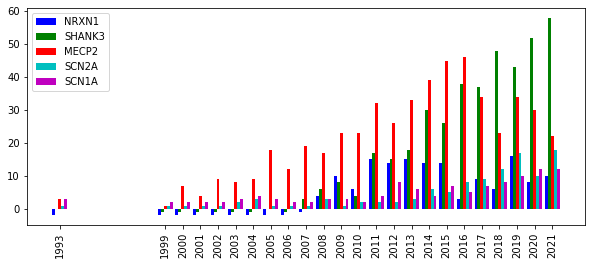

In [14]:
ax = plt.subplot()

width = 1
offsets = [-width*2, -width, 0, width, width*2]
colours = ["b", "g", "r", "c", "m"]
new_years = years*6
labels = np.char.mod("%d", years)

for f in range(5):
    ax.bar(new_years + offsets[f], year_data[f, :] + offsets[f], width=width, color=colours[f], align="center", label=genes[f])
    #print(new_years + offsets[f])
    
ax.set_xticks(new_years)
ax.set_xticklabels(labels, rotation=90)
#ax.figure.set_figheight(8)
ax.figure.set_figwidth(10)
ax.legend()

Text(0, 0.5, '# papers published')

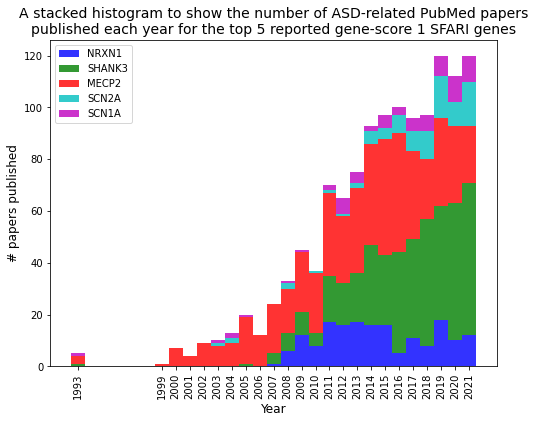

In [96]:
n_bins = years.size
#fcs = [(1,0,0,0.5), (0,1,0,0.5), (0,0,1,0.5), (0.5,0.5,0,0.5), (0.5,0,0.5,0.5)]

fig = plt.figure(figsize=(8,6))
plt.hist(year_data2, range(1993,2023), density=0, histtype="bar", stacked=True,color=colours, alpha=0.8, label=genes)
plt.legend()
plt.xticks(years+0.5, years, rotation=90)
plt.title("A stacked histogram to show the number of ASD-related PubMed papers\npublished each year for the top 5 reported gene-score 1 SFARI genes", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("# papers published", fontsize=12)
#fig.savefig(f'{os.getcwd()}/results/task1-5-stacked.pdf', dpi=fig.dpi)

In [ ]:
# EXTENSION: plot citations too

ValueError: The 'color' keyword argument must have one color per dataset, but 1 datasets and 5 colors were provided

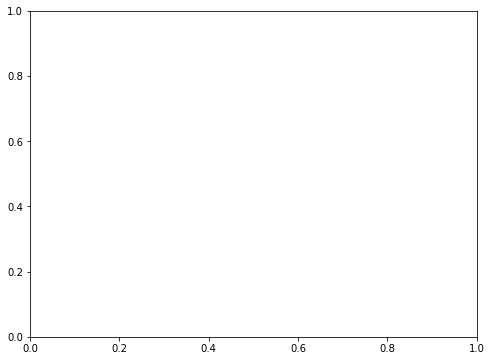

In [41]:
n_bins = years.size
#fcs = [(1,0,0,0.5), (0,1,0,0.5), (0,0,1,0.5), (0.5,0.5,0,0.5), (0.5,0,0.5,0.5)]

fig = plt.figure(figsize=(8,6))
plt.hist(citation_data, range(1993,2023), density=1, histtype="bar", stacked=True,color=colours, alpha=0.8, label=genes)
plt.legend()
plt.xticks(years+0.5, years, rotation=90)
plt.title("A stacked histogram to show the number of autism-related PubMed papers\npublished each year for the top 5 reported SFARI genes with gene-score 1", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("# papers published", fontsize=12)
#fig.savefig(f'{os.getcwd()}/results/task1-5-stacked.pdf', dpi=fig.dpi)

In [115]:
Entrez.email = "s1803764@ed.ac.uk"
num_pubs = []

for g in tqdm(gene_symbols):
    handle = Entrez.esearch(db="pubmed",retmax=2000, term=f"({g}) AND (ASD)")
    record = Entrez.read(handle)
    num_pubs.append(len(record["IdList"]))

100%|███████████████████████████████████████| 1023/1023 [10:29<00:00,  1.63it/s]


Text(0, 0.5, '# papers published')

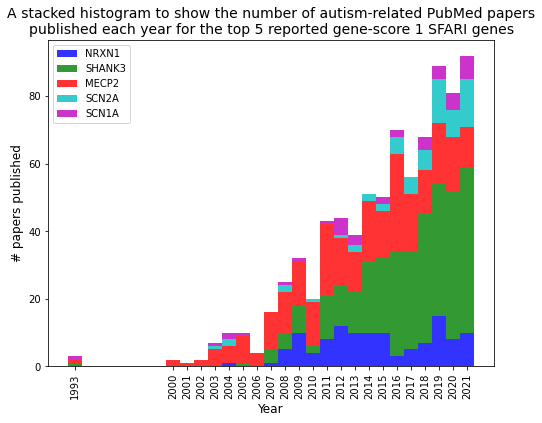

In [254]:
years = np.arange(2000,2022)
year_labels = np.insert(years, 0, 1993)
year_range = np.arange(1993,2023)
n_bins = year_labels.size
#fcs = [(1,0,0,0.5), (0,1,0,0.5), (0,0,1,0.5), (0.5,0.5,0,0.5), (0.5,0,0.5,0.5)]

fig = plt.figure(figsize=(8,6))
plt.hist(all_dates, year_range, density=0, histtype="bar", stacked=True, color=colours, alpha=0.8, label=genes)
plt.legend()
plt.xticks(year_labels+0.5, year_labels, rotation=90)
plt.title("A stacked histogram to show the number of autism-related PubMed papers\npublished each year for the top 5 reported gene-score 1 SFARI genes", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("# papers published", fontsize=12)
#fig.savefig(f'{os.getcwd()}/results/task1-5-stacked.pdf', dpi=fig.dpi)

Text(0, 0.5, '# papers published')

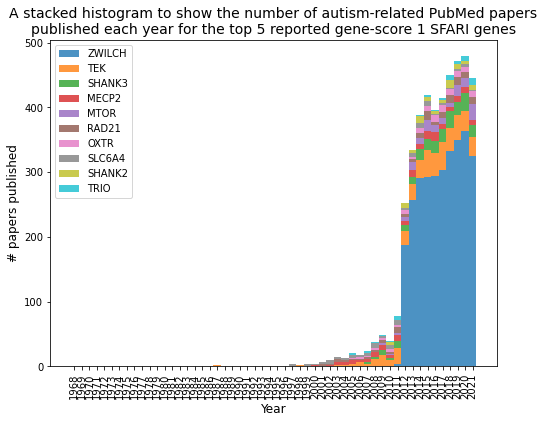

In [207]:
years = np.arange(1968,2022,1)
n_bins = years.size
#fcs = [(1,0,0,0.5), (0,1,0,0.5), (0,0,1,0.5), (0.5,0.5,0,0.5), (0.5,0,0.5,0.5)]

fig = plt.figure(figsize=(8,6))
plt.hist(new_years, range(1968,2023), density=0, histtype="bar", stacked=True, alpha=0.8, label=genes)
plt.legend()
plt.xticks(years+0.5, years, rotation=90)
plt.title("A stacked histogram to show the number of autism-related PubMed papers\npublished each year for the top 5 reported gene-score 1 SFARI genes", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("# papers published", fontsize=12)
#fig.savefig(f'{os.getcwd()}/results/task1-5-stacked.pdf', dpi=fig.dpi)

In [ ]:
ensembls[1022]